In [1]:
import mne
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, SeparableConv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# ---------------- Data Loading and Preprocessing ----------------

# Base path for EEG data files
base_path = r'C:\\Users\\karan\Downloads\\EEG Data\\Data'
subjects = [f'A0{i}' for i in range(1, 10) if i != 4]
event_ids = [7, 8, 9, 10]  # Event IDs for motor imagery tasks: Right Hand, Left Hand, Feet, Tongue

# Initialize lists to hold data
all_features, all_labels = [], []

# Loop through each subject
for subject in subjects:
    file_path = f'{base_path}\\{subject}T.gdf'
    print(f"Processing {subject}...")

    # Load raw EEG data
    raw = mne.io.read_raw_gdf(file_path, preload=True)
    raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])  # Drop EOG channels
    raw.set_eeg_reference()  # Set average reference
    raw.filter(8., 30., fir_design='firwin', verbose=False)  # Bandpass filter (8–30 Hz)

    # Apply ICA for artifact removal
    ica = mne.preprocessing.ICA(n_components=15, random_state=97, max_iter=800)
    ica.fit(raw)
    raw = ica.apply(raw)  # Remove artifacts

    # Extract events and epochs
    events, _ = mne.events_from_annotations(raw)
    epochs = mne.Epochs(
        raw, events, event_id=event_ids, tmin=0.5, tmax=4.0, baseline=(0.5, 1.0), preload=True
    )

    # Append features and labels
    all_features.append(epochs.get_data())  # Shape: (n_epochs, n_channels, n_times)
    all_labels.append(epochs.events[:, -1])  # Event IDs (labels)

# Combine data from all subjects
features = np.concatenate(all_features, axis=0)
labels = np.concatenate(all_labels, axis=0)

print(f"Features shape: {features.shape}")
print(f"Labels shape: {labels.shape}")



Processing A01...
Extracting EDF parameters from C:\Users\karan\Downloads\EEG Data\Data\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


c:\Users\karan\anaconda3\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Reading 0 ... 672527  =      0.000 ...  2690.108 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 32.8s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 22 PCA components
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 876 original time points ...
0 bad epochs dropped
Processing A02...
Extracting EDF parameters from C:\Users\karan\Downloads\EEG Data\Data\A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they 

c:\Users\karan\anaconda3\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 43.6s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 22 PCA components
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 876 original time points ...
0 bad epochs dropped
Processing A03...
Extracting EDF parameters from C:\Users\karan\Downloads\EEG Data\Data\A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG,

c:\Users\karan\anaconda3\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 51.5s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 22 PCA components
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 876 original time points ...
0 bad epochs dropped
Processing A05...
Extracting EDF parameters from C:\Users\karan\Downloads\EEG Data\Data\A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG,

c:\Users\karan\anaconda3\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 47.6s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 22 PCA components
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 876 original time points ...
0 bad epochs dropped
Processing A06...
Extracting EDF parameters from C:\Users\karan\Downloads\EEG Data\Data\A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG,

c:\Users\karan\anaconda3\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 49.9s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 22 PCA components
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 876 original time points ...
0 bad epochs dropped
Processing A07...
Extracting EDF parameters from C:\Users\karan\Downloads\EEG Data\Data\A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG,

c:\Users\karan\anaconda3\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 39.7s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 22 PCA components
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 876 original time points ...
0 bad epochs dropped
Processing A08...
Extracting EDF parameters from C:\Users\karan\Downloads\EEG Data\Data\A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG,

c:\Users\karan\anaconda3\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 45.4s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 22 PCA components
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 876 original time points ...
0 bad epochs dropped
Processing A09...
Extracting EDF parameters from C:\Users\karan\Downloads\EEG Data\Data\A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG,

c:\Users\karan\anaconda3\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 88.2s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 22 PCA components
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 876 original time points ...
0 bad epochs dropped
Features shape: (2304, 22, 876)
Labels shape: (2304,)


Training set shape: (5875, 22, 876, 1)
Testing set shape: (1037, 22, 876, 1)
Training labels shape: (5875,)
Testing labels shape: (1037,)
Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 102ms/step - accuracy: 0.5095 - loss: 2.1383 - val_accuracy: 0.5295 - val_loss: 1.6343 - learning_rate: 0.0010
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.5837 - loss: 1.3092 - val_accuracy: 0.5329 - val_loss: 1.4937 - learning_rate: 0.0010
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.6647 - loss: 1.0593 - val_accuracy: 0.6667 - val_loss: 1.0625 - learning_rate: 0.0010
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.7102 - loss: 1.0177 - val_accuracy: 0.7234 - val_loss: 1.0282 - learning_rate: 0.0010
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.7662 - loss: 0.9616 - val_accuracy: 0.8322 - val_loss: 0.9012 - learning_rate: 0.0010
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.8085 - loss: 0.9420 - 

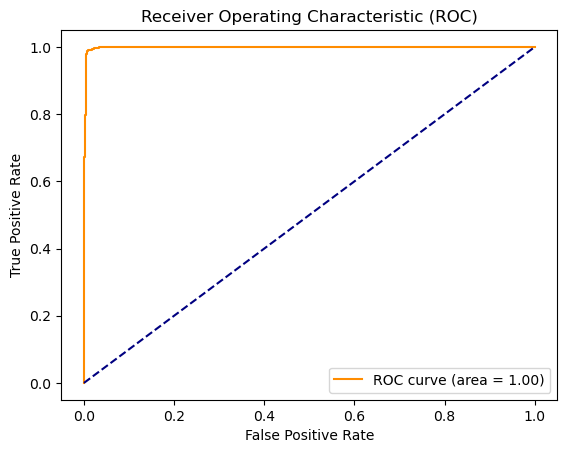

In [5]:
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, SeparableConv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# ---------------- Data Augmentation Before Splitting ----------------

# Map labels to binary classification: Feet = 1, Non-Feet = 0
binary_labels = np.where(labels == 9, 1, 0)  # Event ID for Feet is 9

# Separate Feet and Non-Feet data
feet_features = features[binary_labels == 1]
non_feet_features = features[binary_labels == 0]

# Oversample Feet trials to balance the dataset
n_feet = len(feet_features)
n_non_feet = len(non_feet_features)
oversampled_feet_features = np.tile(feet_features, (n_non_feet // n_feet, 1, 1))
remainder = n_non_feet % n_feet
if remainder > 0:
    oversampled_feet_features = np.concatenate([oversampled_feet_features, feet_features[:remainder]], axis=0)

# Combine the balanced dataset
balanced_features = np.concatenate([oversampled_feet_features, non_feet_features], axis=0)
balanced_labels = np.concatenate([np.ones(len(oversampled_feet_features)), np.zeros(n_non_feet)], axis=0)

# Normalize the features (Z-score normalization)
balanced_features = (balanced_features - np.mean(balanced_features, axis=0)) / np.std(balanced_features, axis=0)

# Apply Gaussian noise for data augmentation
noise_factor = 0.05
augmented_features = balanced_features + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=balanced_features.shape)
augmented_features = np.clip(augmented_features, -1.0, 1.0)  # Ensure valid range for EEG signals

# Combine original and augmented data
final_features = np.concatenate((balanced_features, augmented_features))
final_labels = np.concatenate((balanced_labels, balanced_labels))

# Shuffle the final dataset
final_features, final_labels = shuffle(final_features, final_labels, random_state=42)

# Split into training and testing sets (85% training, 15% testing)
X_train, X_test, y_train, y_test = train_test_split(final_features, final_labels, test_size=0.15, random_state=42)

# Reshape data for CNN input
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

# ---------------- Build the EEGNet Model ----------------

model = Sequential()

# Temporal Convolution Block
model.add(Conv2D(8, kernel_size=(1, 64), padding='same', input_shape=(22, X_train.shape[2], 1),
                 activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size=(22, 1), depth_multiplier=2, use_bias=False, activation='relu',
                          depthwise_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Increased dropout for regularization

# Spatial Convolution Block
model.add(SeparableConv2D(16, kernel_size=(1, 16), use_bias=False, padding='same', activation='relu',
                          depthwise_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 4)))
model.add(Dropout(0.4))  # Increased dropout

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the Model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# ---------------- Training the Model ----------------

# Callbacks for learning rate adjustment and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.15,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

# ---------------- Evaluate the Model ----------------

# Test accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict labels for the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # Default threshold 0.5

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ---------------- Plot ROC Curve ----------------

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import numpy as np

# Initialize Stratified K-Fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Arrays to store performance metrics for each fold
accuracies = []
roc_aucs = []
confusion_matrices = []

fold = 1
for train_index, val_index in skf.split(final_features, final_labels):
    print(f"\nTraining Fold {fold}/{n_splits}...")
    
    # Split the data into training and validation sets
    X_train, X_val = final_features[train_index], final_features[val_index]
    y_train, y_val = final_labels[train_index], final_labels[val_index]
    
    # Reshape data for CNN input
    X_train = X_train[..., np.newaxis]
    X_val = X_val[..., np.newaxis]
    
    # Build the EEGNet model
    model = Sequential()
    model.add(Conv2D(8, kernel_size=(1, 64), padding='same', input_shape=(22, X_train.shape[2], 1),
                     activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(DepthwiseConv2D(kernel_size=(22, 1), depth_multiplier=2, use_bias=False, activation='relu',
                              depthwise_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(SeparableConv2D(16, kernel_size=(1, 16), use_bias=False, padding='same', activation='relu',
                              depthwise_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(1, 4)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy', metrics=['accuracy'])
    
    # Callbacks
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
    
    # Train the model
    model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[reduce_lr, early_stopping],
        verbose=1
    )
    
    # Evaluate the model on the validation set
    y_val_pred_probs = model.predict(X_val)
    y_val_pred = (y_val_pred_probs > 0.5).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_pred_probs)
    confusion = confusion_matrix(y_val, y_val_pred)
    
    # Store metrics
    accuracies.append(accuracy)
    roc_aucs.append(roc_auc)
    confusion_matrices.append(confusion)
    
    # Print fold-specific results
    print(f"Fold {fold} Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    
    fold += 1

# Aggregate metrics
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
mean_roc_auc = np.mean(roc_aucs)
std_roc_auc = np.std(roc_aucs)

# Print results
print("\nCross-Validation Results:")
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")  # Added explicit standard deviation
print(f"Mean ROC-AUC: {mean_roc_auc:.4f} ± {std_roc_auc:.4f}")
print(f"Standard Deviation of ROC-AUC: {std_roc_auc:.4f}")    # Added explicit standard deviation

# Display all confusion matrices
for i, cm in enumerate(confusion_matrices, 1):
    print(f"\nConfusion Matrix for Fold {i}:")
    print(cm)



Training Fold 1/5...


c:\Users\karan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 31s 135ms/step - accuracy: 0.5236 - loss: 1.9946 - val_accuracy: 0.5069 - val_loss: 1.5375 - learning_rate: 0.0010
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 20s 115ms/step - accuracy: 0.6200 - loss: 1.2088 - val_accuracy: 0.5944 - val_loss: 1.1091 - learning_rate: 0.0010
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 19s 112ms/step - accuracy: 0.6780 - loss: 0.9851 - val_accuracy: 0.7578 - val_loss: 0.9068 - learning_rate: 0.0010
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 19s 112ms/step - accuracy: 0.7438 - loss: 0.9399 - val_accuracy: 0.7910 - val_loss: 0.8961 - learning_rate: 0.0010
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - accuracy: 0.8073 - loss: 0.8854 - val_accuracy: 0.8619 - val_loss: 0.8138 - learning_rate: 0.0010
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.8386 - loss: 0.8585 - val_accuracy: 0.8836 - val_loss: 0.7771 - learning_rate: 0.0010
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.8606

c:\Users\karan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 27s 96ms/step - accuracy: 0.5098 - loss: 1.9715 - val_accuracy: 0.5127 - val_loss: 1.3597 - learning_rate: 0.0010
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.5534 - loss: 1.2078 - val_accuracy: 0.6255 - val_loss: 0.9911 - learning_rate: 0.0010
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - accuracy: 0.6088 - loss: 0.9610 - val_accuracy: 0.6725 - val_loss: 0.9278 - learning_rate: 0.0010
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.7060 - loss: 0.8995 - val_accuracy: 0.7542 - val_loss: 0.8745 - learning_rate: 0.0010
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.7840 - loss: 0.8604 - val_accuracy: 0.7643 - val_loss: 0.9423 - learning_rate: 0.0010
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.8039 - loss: 0.8752 - val_accuracy: 0.8590 - val_loss: 0.7846 - learning_rate: 0.0010
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.8422 - l

c:\Users\karan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 29s 125ms/step - accuracy: 0.5094 - loss: 1.9788 - val_accuracy: 0.5022 - val_loss: 2.0627 - learning_rate: 0.0010
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - accuracy: 0.5919 - loss: 1.2001 - val_accuracy: 0.5405 - val_loss: 1.2262 - learning_rate: 0.0010
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - accuracy: 0.6580 - loss: 0.9942 - val_accuracy: 0.7026 - val_loss: 0.9467 - learning_rate: 0.0010
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 18s 105ms/step - accuracy: 0.7318 - loss: 0.9324 - val_accuracy: 0.7880 - val_loss: 0.8984 - learning_rate: 0.0010
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - accuracy: 0.7919 - loss: 0.9009 - val_accuracy: 0.7699 - val_loss: 0.9533 - learning_rate: 0.0010
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 18s 105ms/step - accuracy: 0.8072 - loss: 0.9213 - val_accuracy: 0.8806 - val_loss: 0.8358 - learning_rate: 0.0010
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 18s 103ms/step - accuracy: 0.8

c:\Users\karan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.5154 - loss: 2.0241 - val_accuracy: 0.5007 - val_loss: 1.3945 - learning_rate: 0.0010
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.6156 - loss: 1.2042 - val_accuracy: 0.5941 - val_loss: 1.0957 - learning_rate: 0.0010
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.6906 - loss: 0.9586 - val_accuracy: 0.7287 - val_loss: 0.8698 - learning_rate: 0.0010
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.7516 - loss: 0.8514 - val_accuracy: 0.8394 - val_loss: 0.7567 - learning_rate: 0.0010
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.8105 - loss: 0.8150 - val_accuracy: 0.8495 - val_loss: 0.7666 - learning_rate: 0.0010
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.8241 - loss: 0.8153 - val_accuracy: 0.8799 - val_loss: 0.7483 - learning_rate: 0.0010
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.8316 - l

c:\Users\karan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.5083 - loss: 2.0444 - val_accuracy: 0.5007 - val_loss: 1.6005 - learning_rate: 0.0010
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.5580 - loss: 1.1998 - val_accuracy: 0.5311 - val_loss: 1.2182 - learning_rate: 0.0010
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.6342 - loss: 0.9946 - val_accuracy: 0.6635 - val_loss: 1.0285 - learning_rate: 0.0010
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.7025 - loss: 0.9713 - val_accuracy: 0.7779 - val_loss: 0.9039 - learning_rate: 0.0010
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.7770 - loss: 0.9210 - val_accuracy: 0.8676 - val_loss: 0.8235 - learning_rate: 0.0010
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.8243 - loss: 0.9001 - val_accuracy: 0.8886 - val_loss: 0.7964 - learning_rate: 0.0010
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.8476 - loss: 0